In [7]:
import numpy as np # linear algebra
import pandas as pd 
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

rep_df = pd.read_csv("/kaggle/input/polarisation/Democrats_Year.csv")
dem_df = pd.read_csv("/kaggle/input/polarisation/Republicans_Year.csv")

In [2]:
rep_titles = rep_df['title'].tolist()

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# Custom stopwords list
custom_stopwords = set(stopwords.words('english')).union(set(string.punctuation),
                                                         {"like", "just", "one", "get", "harris","trump",
                                                          "kamala","donald","biden","joe","says","said","let"
                                                         ,"go","tim","would","could","time","think","look",'see'
                                                         , "line",'today',"people","first","much",'day','us','party',
                                                         'make','new','ever','voted','president',"election",'vote',
                                                         'take','need','voter','votes','voted','voting','voters',
                                                         'say','real','gets','get','got','really',
                                                          'house', 'put','days','still',
                                                          "years","another",'other','breaking',
                                                          "back",'going','states','state',
                                                         'democrats','democrat','republicans','republican'})

# Tokenize, remove stopwords, and lowercase
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    return [word for word in tokens if word.isalpha() and word not in custom_stopwords]

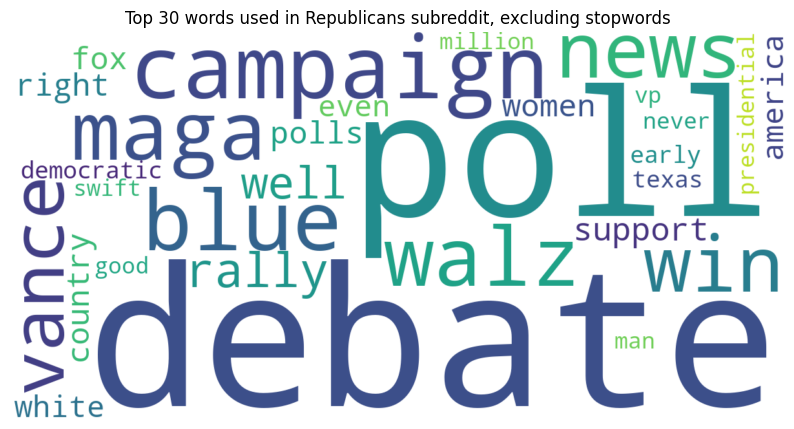

In [8]:
from collections import Counter
from wordcloud import WordCloud

titles_combined = " ".join(rep_titles).lower()
tokens = word_tokenize(titles_combined)
filtered_words = [word for word in tokens if word.isalpha() and word not in custom_stopwords]

# Create frequency distribution
word_freq = Counter(filtered_words)

# Generate the word cloud
wordcloud = WordCloud(width=1200, height=600, 
                      background_color='white',
                    max_words=30 ).generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Top 30 words used in Republicans subreddit, excluding stopwords")
plt.show()

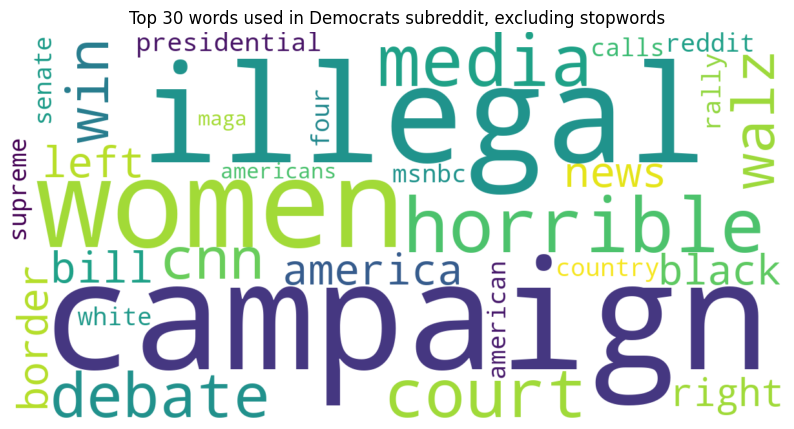

In [10]:
dem_titles = dem_df['title'].tolist()

titles_combined = " ".join(dem_titles).lower()
tokens = word_tokenize(titles_combined)
filtered_words = [word for word in tokens if word.isalpha() and word not in custom_stopwords]

# Create frequency distribution
dem_word_freq = Counter(filtered_words)

# Generate the word cloud
wordcloud = WordCloud(width=1200, height=600, 
                      background_color='white',
                        max_words=30 ).generate_from_frequencies(dem_word_freq)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Top 30 words used in Democrats subreddit, excluding stopwords")
plt.show()

Average comms_num for Democrats: 70.661
Average comms_num for Republicans: 271.766


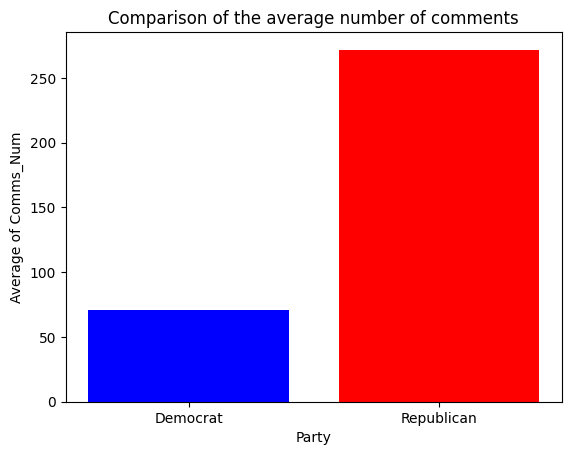

In [12]:
dem_avg = dem_df['comms_num'].mean()
rep_avg = rep_df['comms_num'].mean()

print(f"Average comms_num for Democrats: {dem_avg}")
print(f"Average comms_num for Republicans: {rep_avg}")
labels = ['Democrat', 'Republican']
values = [dem_avg, rep_avg]

plt.bar(labels, values, color=['blue', 'red'])
plt.xlabel('Party')
plt.ylabel('Average of Comms_Num')
plt.title('Comparison of the average number of comments')
plt.show()

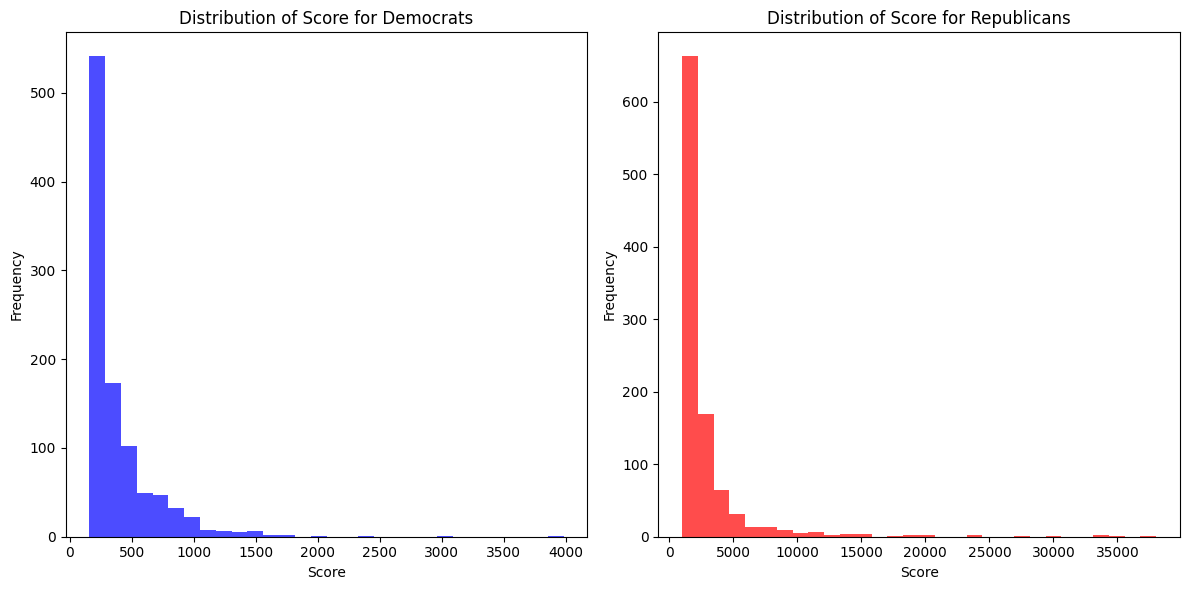

In [13]:
# Assuming dem_df and rep_df are already defined dataframes

# Plot the distribution of 'score' for each dataframe
plt.figure(figsize=(12, 6))

# Distribution for Democrat dataframe
plt.subplot(1, 2, 1)
plt.hist(dem_df['score'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Score for Democrats')

# Distribution for Republican dataframe
plt.subplot(1, 2, 2)
plt.hist(rep_df['score'], bins=30, color='red', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Score for Republicans')

plt.tight_layout()
plt.show()